In [1]:
# %% Library
######################################################################################
# print("Import Libraries & Set up directory")
import numpy as np
import pandas as pd
from Bio import SeqIO
import re
import os
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, quantiles, mode
from matplotlib_venn import venn2

folder_path = "/Users/nguyjust/Library/CloudStorage/OneDrive-OregonHealth&ScienceUniversity/ubsite/"

In [2]:
# Read in the iptm data
data_iptm = pd.read_csv(folder_path + '/data/iptm_info.tsv',
                        sep="\t", low_memory=False)

data_iptm.head()

data_iptm_sm = data_iptm[['uniprot_id', 'ub_mod_loc']]

In [3]:
# Read in the psp data
data_psp = pd.read_csv(folder_path + '/data/psp_info.tsv',
                       sep="\t", low_memory=False)

data_psp.drop(columns={'index', 'sequence'}, inplace=True)

data_psp.head()

data_psp_sm = data_psp[['uniprot_id', 'ub_mod_loc']]

In [4]:
# Quick EDA PSP
print("PSP")

print(f"Number of unique sites: {len(data_psp['ub_mod_loc'])}")

print(f"Number of unique proteins: {len(set(data_psp['uniprot_id']))}")

print(f"Number of unique organisms: {len(set(data_psp['organism']))}")


print("\n\niPTM")

print(f"Number of unique sites: {len(data_iptm['ub_mod_loc'])}")

print(f"Number of unique proteins: {len(set(data_iptm['uniprot_id']))}")

print(f"Number of unique organisms: {len(set(data_iptm['organism']))}")

PSP
Number of unique sites: 126312
Number of unique proteins: 19916
Number of unique organisms: 9


iPTM
Number of unique sites: 138781
Number of unique proteins: 23588
Number of unique organisms: 40


In [5]:
## Determining common sites across two datasets

df_combine = pd.concat([data_iptm_sm, data_psp_sm])
df_duplicates = df_combine[df_combine.duplicated()]
print(f'Combined sites across both databases: {len(df_combine)}')
print(f'Duplicated sites across both databases: {len(df_duplicates)}')

df_unique = df_duplicates.drop_duplicates(ignore_index=True)
print(f'Unique sites across both databases: {len(df_unique)}')

Combined sites across both databases: 265093
Duplicated sites across both databases: 126265
Unique sites across both databases: 125760


In [6]:
## Look at df as sets for uniqueness

## Combine uniprot + location for iptm
data_iptm_1 = data_iptm_sm['uniprot_id'].astype(str) + '-'+ data_iptm_sm['ub_mod_loc'].astype(str)
print(data_iptm_1.head())
print(len(data_iptm_1))
## Create set iptm
data_iptm_1 = set(data_iptm_1)
print(len(data_iptm_1))

# Combine uniprot + location for PSP
data_psp_1 = data_psp_sm['uniprot_id'].astype(str) + '-' + data_psp_sm['ub_mod_loc'].astype(str)
print(data_psp_1.head())
print(len(data_psp_1))
## Create set PSP
data_psp_1 = set(data_psp_1)
print(len(data_psp_1))

0    P01023-841
1    A0ZWU1-111
2     A0ZWU1-19
3      A0ZWU1-6
4    A9ZLL8-137
dtype: object
138781
137707
0     P31946-5
1    P31946-11
2    Q9CQV8-11
3    P35213-11
4    P31946-13
dtype: object
126312
126305


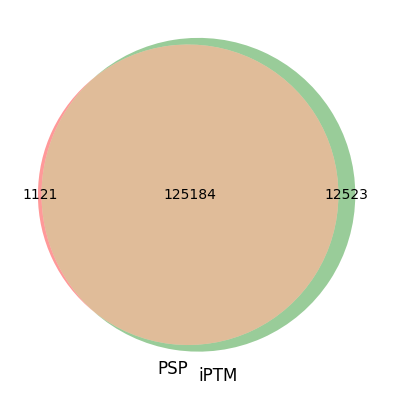

In [9]:
venn2([data_psp_1, data_iptm_1], set_labels=('PSP', 'iPTM'))
plt.show()